In [1]:
# importing the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [5]:
tracks = pd.read_csv("../../Data/tracks.csv")

In [6]:
tracks['Year'] = tracks.release_date.map(lambda date: int(date[:4]))

In [7]:
key_dummies = pd.get_dummies(tracks["key"], prefix= 'key')

In [8]:
dummy_columns = tracks.join(key_dummies)

In [9]:
X = dummy_columns[dummy_columns.columns[8:]].drop(columns = ['key', 'time_signature'])
X

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,0.645,0.4450,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,...,0,0,0,0,0,0,0,0,0,0
1,0.695,0.2630,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,...,0,0,0,0,0,0,0,0,0,0
2,0.434,0.1770,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,...,0,0,0,0,0,0,0,0,0,0
3,0.321,0.0946,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,...,0,0,0,0,0,1,0,0,0,0
4,0.402,0.1580,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,0.560,0.5180,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,...,0,0,0,0,0,0,0,0,0,0
586668,0.765,0.6630,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,...,0,0,0,0,0,0,0,0,0,0
586669,0.535,0.3140,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,...,0,0,0,0,0,1,0,0,0,0
586670,0.696,0.6150,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,...,0,0,0,0,0,0,0,0,1,0


In [10]:
X_new = X.drop(columns=["key_0", "key_1", "key_2", "key_3", "key_4", "key_5", "key_6", "key_7", "key_8", "key_9", "key_10", "key_11"])

In [11]:
# unique values
print("\nUNIQUE VALUES:")
print(X.nunique().sort_values())


UNIQUE VALUES:
key_0                    2
key_9                    2
key_8                    2
key_7                    2
key_6                    2
key_5                    2
key_4                    2
key_3                    2
key_2                    2
key_1                    2
key_10                   2
key_11                   2
mode                     2
Year                   101
danceability          1285
speechiness           1655
liveness              1782
valence               1805
energy                2571
acousticness          5217
instrumentalness      5402
loudness             29196
tempo               122706
dtype: int64


In [12]:
X_new

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Year
0,0.645,0.4450,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,1922
1,0.695,0.2630,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1922
2,0.434,0.1770,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,1922
3,0.321,0.0946,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,1922
4,0.402,0.1580,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,1922
...,...,...,...,...,...,...,...,...,...,...,...
586667,0.560,0.5180,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,2020
586668,0.765,0.6630,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,2020
586669,0.535,0.3140,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,2020
586670,0.696,0.6150,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,2021


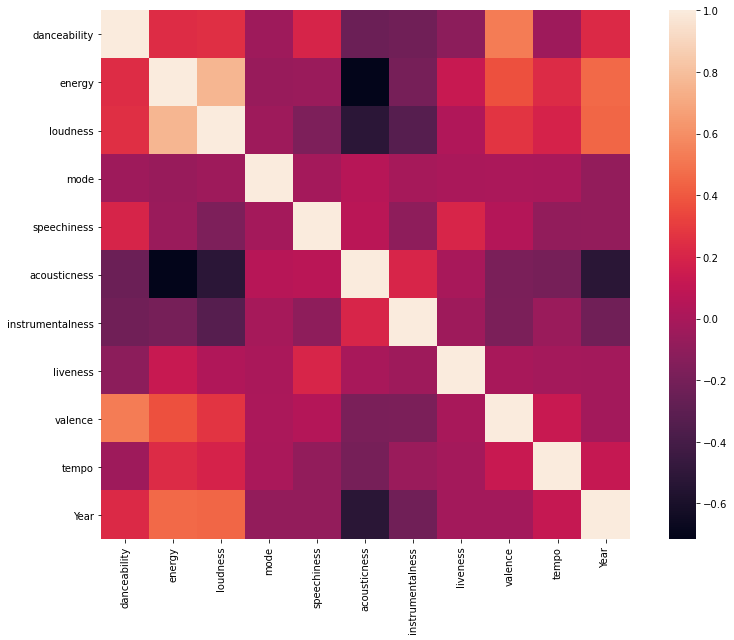

In [13]:
# creating a correlation matrix
corr = X_new.corr()

# plotting the heatmap
f, ax = plt.subplots(figsize=(12,9))

sns.heatmap(corr, square=True, linecolor='white', vmax=1.0, annot=False,);
plt.tight_layout()

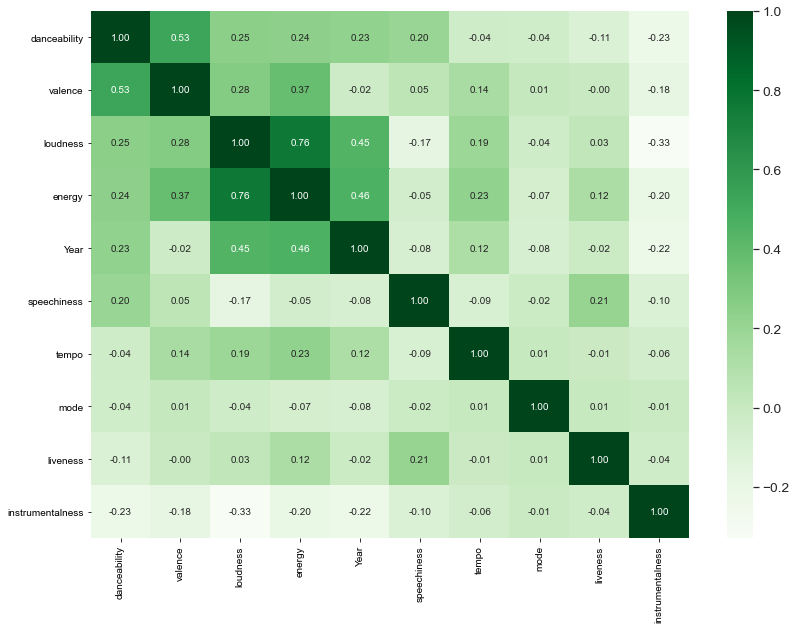

In [14]:
# focused heatmap - Popularity
# number of variables to be selected
k = 10

# finding the most correlated variables
cols = corr.nlargest(k, 'danceability')['danceability'].index
cm = np.corrcoef(X_new[cols].values.T)

#plotting the heatmap
f, ax = plt.subplots(figsize=(12,9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, cmap="Greens")
plt.tight_layout()

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
df_cluster = X_new.iloc[:]

In [18]:
df_cluster.iloc[:, [0,1,2,3,4,5,6,7,8,9,]]

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.645,0.4450,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851
1,0.695,0.2630,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009
2,0.434,0.1770,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418
3,0.321,0.0946,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980
4,0.402,0.1580,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220
...,...,...,...,...,...,...,...,...,...,...
586667,0.560,0.5180,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896
586668,0.765,0.6630,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091
586669,0.535,0.3140,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095
586670,0.696,0.6150,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029


In [19]:
# creating a dataframe without the categorical featur
cluster_data = df_cluster.iloc[:, [0,1,2,3,4,5,6,7,8,9,]].values

In [20]:
# finding out the proper number of clusters
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

KeyboardInterrupt: 

In [20]:
# data preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [26]:
cluster_data[0]

array([  0.645,   0.445, -13.338,   1.   ,   0.451,   0.674,   0.744,
         0.151,   0.127, 104.851])

In [21]:
scaled = scaler.fit_transform(cluster_data)

In [27]:
X_new.describe()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Year
count,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,0.563594,0.542036,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,1988.566168
std,0.166103,0.251923,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,22.831283
min,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000
25%,0.453000,0.343000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,1974.000000
50%,0.577000,0.549000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,1992.000000
75%,0.686000,0.748000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,2007.000000
max,0.991000,1.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,2021.000000


In [22]:
import joblib 
joblib.dump(scaler, "scaler.pickle")

['scaler.pickle']

In [49]:
request_form = dict([('danceability', '50'), ('energy', '50'), ('loudness', '50'), ('mode', '1.0'),('speechiness', '50'), ('acousticness', '50'), ('instrumentalness', '50'), ('liveness', '50'), ('valence', '50'), ('tempo', '50'), ('date_min', '1992'), ('date_max', '2021')])
request_form

{'danceability': '50',
 'energy': '50',
 'loudness': '50',
 'mode': '1.0',
 'speechiness': '50',
 'acousticness': '50',
 'instrumentalness': '50',
 'liveness': '50',
 'valence': '50',
 'tempo': '50',
 'date_min': '1992',
 'date_max': '2021'}

In [73]:
model_input = []
for key, value in request_form.items():
    if key not in ('date_min', 'date_max'):
        if key in ('loudness', 'tempo'):
            model_input.append((float(value)))
        else:
            model_input.append(( float(value)/100.0))
            f
model_input = np.array(model_input)
print(model_input)

[5.e-01 5.e-01 5.e+01 1.e-02 5.e-01 5.e-01 5.e-01 5.e-01 5.e-01 5.e+01]


In [99]:
tracks_characteristics = tracks.drop(columns= ["id", "Year", "id_artists", "duration_ms", "time_signature"])
tracks_characteristics

,name,popularity,explicit,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Carve,6,0,['Uli'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851
1,Capítulo 2.16 - Banquero Anarquista,0,0,['Fernando Pessoa'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009
2,Vivo para Quererte - Remasterizado,0,0,['Ignacio Corsini'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418
3,El Prisionero - Remasterizado,0,0,['Ignacio Corsini'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980
4,Lady of the Evening,0,0,['Dick Haymes'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,云与海,50,0,['阿YueYue'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896
586668,blind,72,0,['ROLE MODEL'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091
586669,What They'll Say About Us,70,0,['FINNEAS'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095
586670,A Day At A Time,58,0,"['Gentle Bones', 'Clara Benin']",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029


In [90]:
tracks_characteristics_for_scale = X_new.drop(columns= "Year")

In [91]:
scaled_tracks = scaler.transform(tracks_characteristics_for_scale)

In [93]:
model.predict(scaled_tracks)

array([ 34, 353,  40, ...,   0, 105, 430], dtype=int32)

In [100]:
tracks_characteristics["Cluster Number"] = model.predict(scaled_tracks)

In [96]:
X_new

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Year
0,0.645,0.4450,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,1922
1,0.695,0.2630,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1922
2,0.434,0.1770,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,1922
3,0.321,0.0946,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,1922
4,0.402,0.1580,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,1922
...,...,...,...,...,...,...,...,...,...,...,...
586667,0.560,0.5180,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,2020
586668,0.765,0.6630,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,2020
586669,0.535,0.3140,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,2020
586670,0.696,0.6150,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,2021


In [101]:
tracks_characteristics

,name,popularity,explicit,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Cluster Number
0,Carve,6,0,['Uli'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,34
1,Capítulo 2.16 - Banquero Anarquista,0,0,['Fernando Pessoa'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,353
2,Vivo para Quererte - Remasterizado,0,0,['Ignacio Corsini'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,40
3,El Prisionero - Remasterizado,0,0,['Ignacio Corsini'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,304
4,Lady of the Evening,0,0,['Dick Haymes'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,云与海,50,0,['阿YueYue'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,88
586668,blind,72,0,['ROLE MODEL'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,166
586669,What They'll Say About Us,70,0,['FINNEAS'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,0
586670,A Day At A Time,58,0,"['Gentle Bones', 'Clara Benin']",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,105


In [102]:
tracks_characteristics.to_csv("tracks_w_clusters2.csv")

In [51]:
scaler.transform([model_input])

array([[0.50454087, 0.5       , 1.68257465, 0.01      , 0.51493306,
        0.50200803, 0.5       , 0.5       , 0.5       , 0.20293773]])

In [33]:
date_range = (request_form['date_min'], request_form['date_max'])
date_range

('1992', '2021')

In [25]:
# instantiating model
model = KMeans(n_clusters = 500, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = model.fit_predict(scaled)

NameError: name 'model' is not defined

IndexError: boolean index did not match indexed array along dimension 0; dimension is 586672 but corresponding boolean dimension is 300

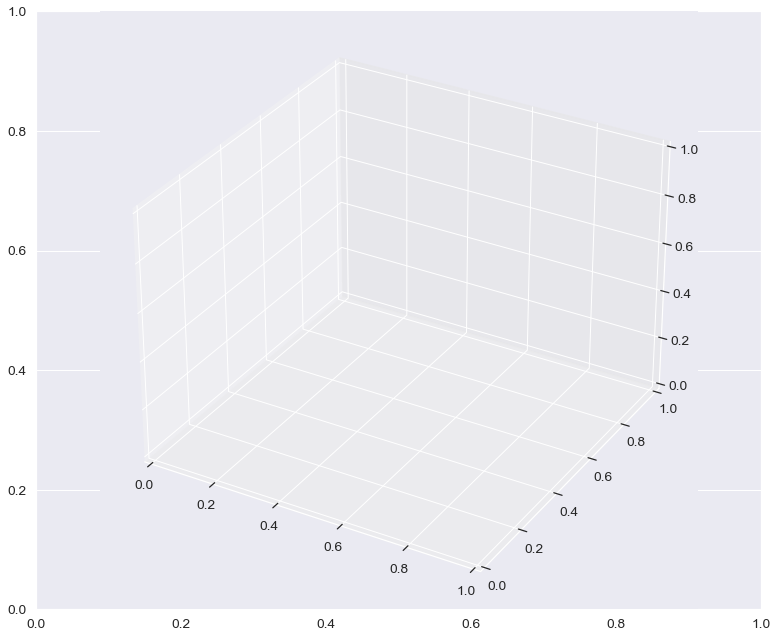

In [116]:
from mpl_toolkits.mplot3d import Axes3D
# visualizing clusters
fig, ax = plt.subplots(figsize=(13,11))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(scaled[y_kmeans[:300] == 0,0], scaled[y_kmeans[:300] == 0,1], s= 50, c= 'red',label= 'Cluster 1')
plt.scatter(scaled[y_kmeans[:300] == 1,0], scaled[y_kmeans[:300] == 1,1], s= 50, c= 'blue', label= 'Cluster 2')
plt.scatter(scaled[y_kmeans[:300] == 2,0], scaled[y_kmeans[:300] == 2,1], s= 50, c= 'green', label= 'Cluster 3')
plt.scatter(scaled[y_kmeans[:300] == 3,0], scaled[y_kmeans[:300] == 3,1], s= 50, c= 'cyan', label= 'Cluster 4')
plt.scatter(scaled[y_kmeans[:300] == 4,0], scaled[y_kmeans[:300] == 4,1], s= 50, c= 'magenta', label= 'Cluster 5')
# centroids[:300]
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s= 300, c= 'yellow', label= 'Centroids')
plt.title('Clusters')
plt.legend()
plt.savefig('clusters.png')
plt.show()

In [26]:
# predictions 
y_kmeans

array([ 34, 353,  40, ...,   0, 105, 430], dtype=int32)

In [72]:
# converting preditcions into a df
kmeans = pd.DataFrame(data=y_kmeans, dtype=int)
kmeans.columns = ['k_cluster']

# predictions as a df
print(kmeans.shape)
kmeans.head()

NameError: name 'y_kmeans' is not defined

In [71]:
# concatenating the cluster column to the dataframe
df_cluster = pd.concat([df_cluster, kmeans], axis=1)

# checking the dataframe
print(df_cluster.shape)
df_cluster.head()

NameError: name 'kmeans' is not defined

In [29]:
# statistical distribution of the data in each column, for each cluster
#df_cluster.groupby("k_cluster").describe()

In [63]:
new_sample = (X_new.loc[586668]+.04).drop("Year")

In [53]:
import joblib

In [36]:
model.predict([new_sample])

array([300], dtype=int32)

In [37]:
joblib.dump(model, "cluster_model.pickle")

['cluster_model.pickle']

In [38]:
%store new_sample

Stored 'new_sample' (Series)


In [ ]:
# cluster_data = df_cluster.iloc[:, [0,1,2,3,4,5,6,7,8,9,]].values

In [56]:
scaler = joblib.load("../../scaler.pickle")
model = joblib.load("../../cluster_model.pickle")

In [55]:
scaler

MinMaxScaler()

In [57]:
model

KMeans(n_clusters=500, random_state=0)

In [59]:
sample_test = [5.00e-01, 5.00e-01, 0.00e+00, 1.00e-02, 5.00e-01, 5.00e-01, 5.00e-01, 5.00e-01,
 5.00e-01, 1.75e+02]

In [68]:
sample_test_scaled = scaler.transform([sample_test])

In [70]:
model.predict(sample_test_scaled)

array([490], dtype=int32)

In [119]:
tracks_characteristics.loc[(tracks_characteristics["Cluster Number"]==230)
& (tracks_characteristics["popularity"]>40)]

,name,popularity,explicit,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Cluster Number
44671,What's Happening Brother,52,0,['Marvin Gaye'],1971-05-21,0.461,0.672,5,-10.699,0,0.0401,0.565,0.313,0.2390,0.701,97.651,230
45840,Get up and Dance,45,0,['The Doors'],1972-07-17,0.749,0.601,0,-13.553,0,0.1150,0.814,0.548,0.0990,0.676,131.657,230
46872,Love Is Everywhere,46,0,['Pharoah Sanders'],1973-01-01,0.507,0.726,5,-11.719,0,0.0375,0.886,0.341,0.1540,0.751,127.825,230
47604,Autumn Leaves,54,0,['Chet Baker'],1974,0.350,0.607,5,-11.141,0,0.0498,0.794,0.446,0.1160,0.597,187.101,230
48742,Help on the Way / Slipknot! - 2013 Remaster,48,0,['Grateful Dead'],1975,0.525,0.390,0,-13.405,0,0.0355,0.742,0.389,0.2480,0.728,179.172,230
49602,I Want You,57,0,['Marvin Gaye'],1976-03-16,0.515,0.793,1,-9.557,0,0.0340,0.849,0.317,0.2360,0.737,100.551,230
49640,Preciso Me Encontrar,55,0,['Cartola'],1976-02-06,0.545,0.493,2,-12.413,0,0.0594,0.856,0.499,0.1420,0.701,77.050,230
51115,The World Is a Ghetto,41,0,['George Benson'],1977,0.549,0.530,0,-15.127,0,0.0387,0.572,0.461,0.3400,0.714,117.166,230
64179,Can't Run But,45,0,['Paul Simon'],1990-10-16,0.735,0.589,4,-15.578,0,0.0382,0.917,0.420,0.1150,0.923,159.963,230
74496,Me Gustas Tu,73,0,['Manu Chao'],2001-06-01,0.657,0.741,11,-6.822,0,0.0825,0.663,0.494,0.2220,0.908,175.949,230


In [ ]:
purchase_data.loc[(purchase_data['SN'] == 'Lisosia93')|
                  (purchase_data['SN']=='Idastidru52')|
                  (purchase_data['SN']=='Chamjask73')|
                  (purchase_data['SN']=='Iral74')|
                  (purchase_data['SN']=='Iskadarya95')] 